# 导入工具包

In [1]:
# mediapipe人工智能工具包
import mediapipe as mp
# opencv-python
import cv2
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 导入模型

In [2]:
# import solution
mp_pose = mp.solutions.pose
# drawing_utils
mp_drawing = mp.solutions.drawing_utils
# guide the model
pose = mp_pose.Pose(static_image_mode=True,         # static image or video
                    model_complexity=2,             # choose the complexity of model [0,2]
                    smooth_landmarks=True,          # Whether to smooth key points
                    enable_segmentation=True,      # Is the human body keying
                    min_detection_confidence=0.5,   # Confidence threshold
                    min_tracking_confidence=0.5)    # tracking confidence threshold


# 定义可视化图像函数

In [3]:
# BGR(cv2) -> RGB(plt)
def show_image(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 读入图像

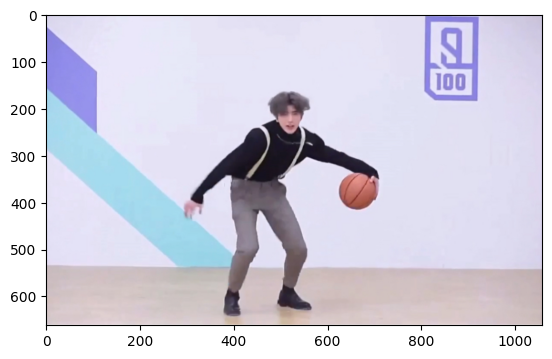

In [4]:
img = cv2.imread('example/KunBasketball.png')
show_image(img)

# 图像输入模型

In [5]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = pose.process(img_RGB)

# 人体抠图结果

In [6]:
mask = results.segmentation_mask
mask.shape

(662, 1058)

In [7]:
img.shape

(662, 1058, 3)

In [8]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

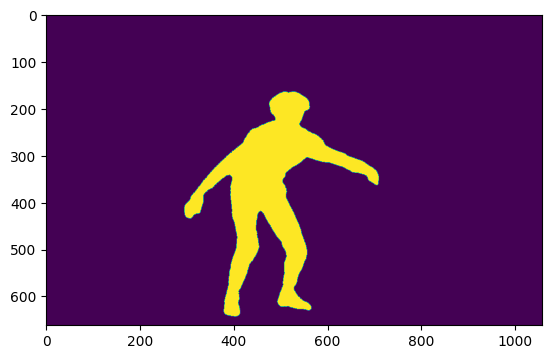

In [9]:
mask = mask > 0.5
plt.imshow(mask)
plt.show()

In [10]:
import numpy as np
# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得扣掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

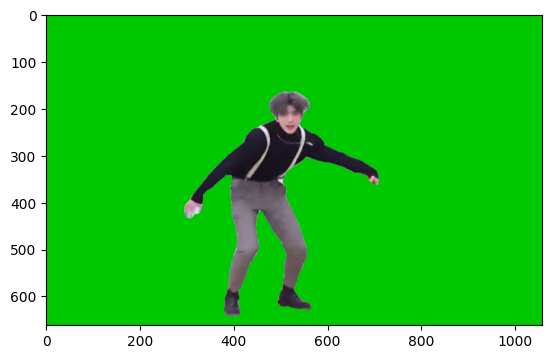

In [11]:
show_image(FG_img)

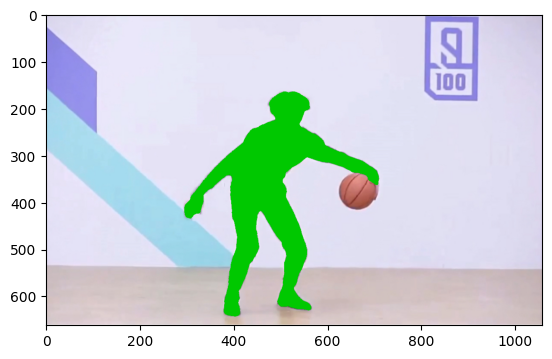

In [12]:
show_image(BG_img)

# 所有关键点检测结果

In [13]:
results.pose_landmarks

landmark {
  x: 0.4983406960964203
  y: 0.3410658836364746
  z: -0.5819246768951416
  visibility: 0.9999977350234985
}
landmark {
  x: 0.5016584396362305
  y: 0.32021504640579224
  z: -0.5644369721412659
  visibility: 0.9999877214431763
}
landmark {
  x: 0.504923939704895
  y: 0.3191223442554474
  z: -0.564676821231842
  visibility: 0.999984860420227
}
landmark {
  x: 0.5076674222946167
  y: 0.3182065188884735
  z: -0.5645909905433655
  visibility: 0.9999841451644897
}
landmark {
  x: 0.49141135811805725
  y: 0.3225717842578888
  z: -0.5798725485801697
  visibility: 0.999997615814209
}
landmark {
  x: 0.4874171316623688
  y: 0.323748379945755
  z: -0.5801966190338135
  visibility: 0.9999983310699463
}
landmark {
  x: 0.48351284861564636
  y: 0.32496798038482666
  z: -0.5803669095039368
  visibility: 0.9999985694885254
}
landmark {
  x: 0.5064604878425598
  y: 0.32137179374694824
  z: -0.4268096685409546
  visibility: 0.9999809265136719
}
landmark {
  x: 0.4756811261177063
  y: 0.328137

In [14]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [15]:
# 左胳膊肘的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.5905587673187256
y: 0.46498966217041016
z: -0.1844470053911209
visibility: 0.9861198663711548

In [16]:
# 左胳膊肘的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.5905587673187256
y: 0.46498966217041016
z: -0.1844470053911209
visibility: 0.9861198663711548

# 解析指定关键点的像素坐标

In [17]:
img.shape

(662, 1058, 3)

In [18]:
h = img.shape[0]
w = img.shape[1]

In [19]:
# 左胳膊肘的像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

624.8111758232117

In [20]:
# 左胳膊肘的像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

307.8231563568115

# 解析指定关键点的真实物理（米）坐标

In [21]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.49207815527915955
y: -0.2421112060546875
z: -0.17810910940170288
visibility: 0.9861198663711548

In [22]:
results.pose_world_landmarks.landmark[13]

x: 0.49207815527915955
y: -0.2421112060546875
z: -0.17810910940170288
visibility: 0.9861198663711548

# 交互式三维可视化

In [23]:
coords = np.array(results.pose_landmarks.landmark)
coords

array([x: 0.4983406960964203
       y: 0.3410658836364746
       z: -0.5819246768951416
       visibility: 0.9999977350234985, x: 0.5016584396362305
                                       y: 0.32021504640579224
                                       z: -0.5644369721412659
                                       visibility: 0.9999877214431763,
       x: 0.504923939704895
       y: 0.3191223442554474
       z: -0.564676821231842
       visibility: 0.999984860420227, x: 0.5076674222946167
                                      y: 0.3182065188884735
                                      z: -0.5645909905433655
                                      visibility: 0.9999841451644897,
       x: 0.49141135811805725
       y: 0.3225717842578888
       z: -0.5798725485801697
       visibility: 0.999997615814209, x: 0.4874171316623688
                                      y: 0.323748379945755
                                      z: -0.5801966190338135
                                      visibility: 

In [24]:
len(coords)

33

In [25]:
coords[0].x

0.4983406960964203

In [26]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [27]:
points.shape

(33, 3)

In [28]:
points

array([[ 0.4983407 ,  0.34106588, -0.58192468],
       [ 0.50165844,  0.32021505, -0.56443697],
       [ 0.50492394,  0.31912234, -0.56467682],
       [ 0.50766742,  0.31820652, -0.56459099],
       [ 0.49141136,  0.32257178, -0.57987255],
       [ 0.48741713,  0.32374838, -0.58019662],
       [ 0.48351285,  0.32496798, -0.58036691],
       [ 0.50646049,  0.32137179, -0.42680967],
       [ 0.47568113,  0.32813746, -0.49597481],
       [ 0.5013507 ,  0.35376394, -0.52440292],
       [ 0.49124393,  0.35668385, -0.54615116],
       [ 0.5245173 ,  0.40345851, -0.26031774],
       [ 0.42918265,  0.40050033, -0.42013285],
       [ 0.59055877,  0.46498966, -0.18444701],
       [ 0.36656326,  0.48843959, -0.45812961],
       [ 0.65075403,  0.51001537, -0.23524362],
       [ 0.30845818,  0.58074242, -0.57042104],
       [ 0.65972102,  0.52723074, -0.2448213 ],
       [ 0.28970858,  0.61102438, -0.61884171],
       [ 0.65982652,  0.5282743 , -0.29141843],
       [ 0.29893303,  0.61857218, -0.649

In [29]:
import open3d
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
